In [1]:
import tensorflow as tf
print(tf.__version__)
import aiogram as a
print(a.__version__)

2.16.1
3.15.0


In [1]:

import os
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from keras._tf_keras.keras.layers import Dense
from keras._tf_keras.keras import utils
import matplotlib.pyplot as plt
from keras._tf_keras.keras.models import Model
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#batch_size=32 # Batch size

**Names of classes in datasets**

In [3]:
class_names = ['No', 'edible', 'hallucinogenic', 'inedible', 'poisonous']

**Transforming photos into tensor images**

In [4]:

import tensorflow as tf
import os
from tensorflow import keras

path_to_folder = './photos'  # Path to the folder
batch_size = 20
train_path = os.path.join(path_to_folder, 'Train')
valid_path = os.path.join(path_to_folder, 'Valid')
test_path = os.path.join(path_to_folder, 'Test')
target_size = (224, 224)  # Resize images to 224x224
class_names = os.listdir(train_path)  # List of class names (folder names)
print(class_names)
# Function to load and preprocess images
def preprocess_image(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)  # Decode JPEG/PNG images
    image = tf.image.resize(image, [224, 224])      # Resize to (224, 224)
    image = image / 255.0                           # Normalize pixel values
    return image

# Function to load labels
def get_label_from_path(image_path):
    # Extract the class label from the folder name (parent directory)
    image_path_str = image_path.numpy().decode('utf-8')  # Convert Tensor to string
    label = os.path.basename(os.path.dirname(image_path_str))  # Extract parent folder name
    return label

# Function to load dataset from a directory
def load_dataset(directory):
    image_paths = []
    labels = []

    # Traverse the directory structure
    for root, _, files in os.walk(directory):
        for fname in files:
            if fname.lower().endswith((".png", ".jpg", ".jpeg", ".gif", ".bmp", ".pbm", ".pnm")):
                # Append the full path of the image
                image_paths.append(os.path.join(root, fname))
                # Get the label from the parent folder name
                labels.append(os.path.basename(root))

    print(f"Image paths in {directory}: {image_paths}")  # Debug: Print image paths
    print(f"Labels in {directory}: {labels}")  # Debug: Print corresponding labels

    # Convert image paths and labels to tensors
    image_paths = tf.constant(image_paths, dtype=tf.string)
    labels = tf.constant(labels, dtype=tf.string)

    return image_paths, labels




def one_hot_encode(label, num_classes=5):
    return tf.one_hot(label, num_classes)

# Create dataset from the image paths and labels
train_image_paths, train_labels = load_dataset(train_path)
valid_image_paths, valid_labels = load_dataset(valid_path)
test_image_paths, test_labels = load_dataset(test_path)

# Convert labels to integer indices (assuming the labels are in the correct order)
label_to_index = {class_name: index for index, class_name in enumerate(class_names)}
train_labels = [label_to_index[label.numpy().decode('utf-8')] for label in train_labels]
valid_labels = [label_to_index[label.numpy().decode('utf-8')] for label in valid_labels]
test_labels = [label_to_index[label.numpy().decode('utf-8')] for label in test_labels]

# Cast labels to tf.int32
#train_labels = tf.convert_to_tensor(train_labels, dtype=tf.int32)
#valid_labels = tf.convert_to_tensor(valid_labels, dtype=tf.int32)
test_labels = tf.convert_to_tensor(test_labels, dtype=tf.int32)

# Create TensorFlow Dataset
#train_dataset = tf.data.Dataset.from_tensor_slices((train_image_paths, train_labels))
#valid_dataset = tf.data.Dataset.from_tensor_slices((valid_image_paths, valid_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((test_image_paths, test_labels))

# Map the preprocessing function to each item in the dataset and apply one-hot encoding
#train_dataset = train_dataset.map(lambda x, y: (preprocess_image(x), one_hot_encode(y)))
#valid_dataset = valid_dataset.map(lambda x, y: (preprocess_image(x), one_hot_encode(y)))
test_dataset = test_dataset.map(lambda x, y: (preprocess_image(x), one_hot_encode(y)))

# Shuffle, batch, and prefetch datasets
#train_dataset = train_dataset.shuffle(buffer_size=1000).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
#valid_dataset = valid_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

train_dataset = tf.data.Dataset.from_tensor_slices((train_image_paths, train_labels))
train_dataset = train_dataset.map(lambda x, y: (preprocess_image(x), one_hot_encode(y)))
train_dataset = train_dataset.shuffle(buffer_size=1000).batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)

valid_dataset = tf.data.Dataset.from_tensor_slices((valid_image_paths, valid_labels))
valid_dataset = valid_dataset.map(lambda x, y: (preprocess_image(x), one_hot_encode(y)))
valid_dataset = valid_dataset.batch(batch_size).prefetch(tf.data.experimental.AUTOTUNE)


['edible', 'hallucinogenic', 'inedible', 'No', 'poisonous']
Image paths in ./photos\Train: ['./photos\\Train\\edible\\000001.jpg', './photos\\Train\\edible\\000002.jpg', './photos\\Train\\edible\\000003.jpg', './photos\\Train\\edible\\000004.jpg', './photos\\Train\\edible\\000005.jpg', './photos\\Train\\edible\\000006.jpg', './photos\\Train\\edible\\000007.jpg', './photos\\Train\\edible\\000008.jpg', './photos\\Train\\edible\\000009.jpg', './photos\\Train\\edible\\000010.jpg', './photos\\Train\\edible\\000011.jpg', './photos\\Train\\edible\\000012.jpg', './photos\\Train\\edible\\000013.jpg', './photos\\Train\\edible\\000014.jpg', './photos\\Train\\edible\\000015.jpg', './photos\\Train\\edible\\000016.jpg', './photos\\Train\\edible\\M000001.jpg', './photos\\Train\\edible\\M000002.jpg', './photos\\Train\\edible\\M000003.jpg', './photos\\Train\\edible\\M000004.jpg', './photos\\Train\\edible\\M000005.jpg', './photos\\Train\\edible\\M000006.jpg', './photos\\Train\\edible\\M000007.jpg', './p

In [6]:
print(f"Train directory contents: {os.listdir(train_path)}")
print(f"Valid directory contents: {os.listdir(valid_path)}")
print(f"Test directory contents: {os.listdir(test_path)}")
print(f"Train Dataset Length: {len(list(train_dataset))}")
print(f"Valid Dataset Length: {len(list(valid_dataset))}")
print(f"Test Dataset Length: {len(list(test_dataset))}")

Train directory contents: ['edible', 'hallucinogenic', 'inedible', 'No', 'poisonous']
Valid directory contents: ['edible', 'hallucinogenic', 'inedible', 'No', 'poisonous']
Test directory contents: ['edible', 'hallucinogenic', 'inedible', 'No', 'poisonous']
Train Dataset Length: 82
Valid Dataset Length: 21
Test Dataset Length: 11


These are distributed into training/validation/test samples in the ratio 72/18/10. Each sample contains 5 classes.

## Model training


**Loading model**

In [5]:
dense_net = keras.applications.DenseNet201()

In [6]:
dense_net.summary() # Structure of a convolutional neural network

Model: "densenet201"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 20,242,984 (77.22 MB)

 Trainable params: 20,013,928 (76.35 MB)

 Non-trainable params: 229,056 (894.75 KB)

**Adding the final class classification layer**

In [7]:
x = dense_net.layers[-1].output
output = Dense(len(class_names), activation='softmax')(x) 
model = Model(inputs=dense_net.input, outputs=output)

**Отключение у первых 24 слоёв способность обучения**

In [8]:
for layer in model.layers[:-24]:
    layer.trainable = False

**Настройка ранней остановки обучения и модели**

In [11]:
from keras import metrics
import keras._tf_keras.keras.backend as k
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=[keras.metrics.CategoricalAccuracy()]
)

# Set early stopping
early_stopping = keras.callbacks.EarlyStopping(
    patience=10, 
    min_delta=0.001,
    restore_best_weights=True
)

**Отключение предупреждений у модели**

In [12]:
tf.config.run_functions_eagerly(False)

**Обучение модели**

In [116]:
model.reset_metrics()

In [15]:
print(len(train_image_paths))  # Number of training images
print(len(train_labels)) 


1633
1633


In [132]:
print("Model metrics:", model.metrics)

Model metrics: [<Mean name=loss>, <CompileMetrics name=compile_metrics>]


In [13]:
#%%time
# Обучаем модель

history = model.fit(
    x=train_dataset,
    validation_data=valid_dataset,
    epochs=150,
    callbacks=[early_stopping]
)

Epoch 1/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 246s 3s/step - categorical_accuracy: 0.5285 - loss: 1.5647 - val_categorical_accuracy: 0.4428 - val_loss: 1.5015
Epoch 2/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 181s 2s/step - categorical_accuracy: 0.5590 - loss: 1.4557 - val_categorical_accuracy: 0.4428 - val_loss: 1.4330
Epoch 3/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - categorical_accuracy: 0.5509 - loss: 1.3697 - val_categorical_accuracy: 0.4428 - val_loss: 1.4012
Epoch 4/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 174s 2s/step - categorical_accuracy: 0.5613 - loss: 1.2915 - val_categorical_accuracy: 0.4428 - val_loss: 1.3562
Epoch 5/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 179s 2s/step - categorical_accuracy: 0.6214 - loss: 1.2431 - val_categorical_accuracy: 0.5025 - val_loss: 1.3020
Epoch 6/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 174s 2s/step - categorical_accuracy: 0.6536 - loss: 1.1885 - val_categorical_accuracy: 0.4876 - val_loss: 1.2846
Epoch 7/150
82/82 ━━━━━━━━━━━━━━━━━━━━ 172s 2s/step - categorical_accuracy: 0.6568 - los

In [14]:
print(history.history.keys())

dict_keys(['categorical_accuracy', 'loss', 'val_categorical_accuracy', 'val_loss'])


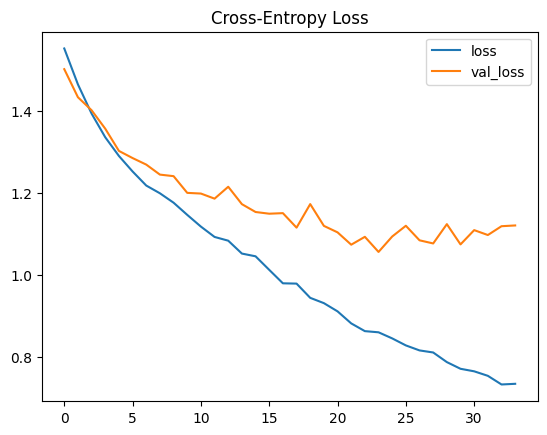

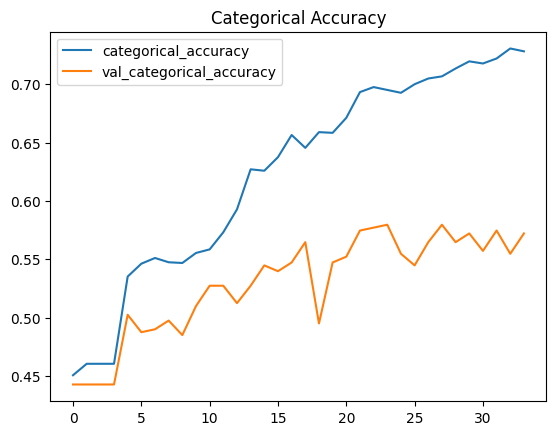

11/11 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - categorical_accuracy: 0.7485 - loss: 0.8184
Accuracy: 59.41%


In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert history to a DataFrame
history_df = pd.DataFrame(history.history)

# Plot loss
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-Entropy Loss")
plt.show()

# Plot accuracy
history_df.loc[:, ['categorical_accuracy', 'val_categorical_accuracy']].plot(title="Categorical Accuracy")
plt.show()
scores = model.evaluate(test_dataset)
print(f'Accuracy: {round((scores[1] * 100), 2)}%')  # Adjust based on evaluation metric


**Просмотр потерь и точности на тренировочных и валидационных данных**


if 'history' in locals():
    history_df = pd.DataFrame(history.history)
    history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
    history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title="Accuracy")
else:
    print("Model training did not complete successfully.")


In [18]:
print("Model metrics:", model.metrics)

Model metrics: [<Mean name=loss>, <CompileMetrics name=compile_metrics>]


In [17]:
print("Train dataset shape:", train_dataset)
print("Validation dataset shape:", valid_dataset)
print("Test dataset shape:", test_dataset)


Train dataset shape: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>
Validation dataset shape: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>
Test dataset shape: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>


Вывод по графикам:

    После 32 эпохи модель начала переобучаться

**Точность модели на тестовой выборке**

Точность модели составляет 71.08%, что является не плохим результатом

**Сохранение модели**

In [16]:
model.save('my_model1.keras')

In [139]:
model.save('my_model1.h5')